In [1]:
import pandas as pd
import numpy as np

_____________________________________________________________________________________________

**Loading Shark Attack Data**

In [2]:
file_path= "GSAF5.csv"

In [3]:
sharks_df = pd.read_csv(file_path)

____________________________________________________________________________________________

**Cleaning Shark Attack Data**

In [4]:
#Already cleaned before uploaded:
#Deleted approx 60k empty rows.
#Converted values from str to num for year and age columns.

In [5]:
#There are 15 columns and 6940 rows.
sharks_df.shape

(6940, 15)

In [ ]:
#Percentage of rows missing data per column.
sharks_df.isna().sum()/len(sharks_df)*100

In [7]:
display(sharks_df)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Source
0,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
1,04-Feb-2024,2024.0,Provoked,TRINIDAD,NaN,NaN,Spearfishing,male,M,NaN,Shoulder bitten,N,06h30,Blacktip reef shark,"Trinidad Guardian, 2/11/2014"
2,29 Jan-2024,2024.0,Unprovoked,AUSTRALIA,New South Wales,"Elizabeth Bay, Sydney Harbor",Swimming,Lauren O'Neill,F,29,Right leg bitten,N,20h00,Bull shark,"Nine News, 12/31/2024"
3,15 Jan-2024,2024.0,Unprovoked,BAHAMAS,Paradise Island,Paradise Island Resort,Swimming,male,M,10,Right leg injured,N,16h00,NaN,"Caribbean Loop News, 1/15;2024"
4,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surfing,Murray Adams,M,64,Leg bitten,N,13h00,White shark,"A. Currie, GSAF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6935,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6936,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6937,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6938,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


____________________________________________________________________________________________

**Cleaning Each Column**

In [8]:
#Cleaning the "Year" column and converting to object
sharks_df["Year"] = sharks_df["Year"].fillna("UNKNOWN")  # Fill all empty cells with "UNKNOWN"
sharks_df["Year"] = sharks_df["Year"].astype(str)  # Convert the column to string type

In [9]:
#Cleaning the "Fatal" column and converting to object
sharks_df["Fatal"] = sharks_df["Fatal"].fillna("UNKNOWN")  # Fill all empty cells with "UNKNOWN"
sharks_df["Fatal"] = sharks_df["Fatal"].replace({"M":"UNKNOWN","F":"UNKNOWN","Nq":"UNKNOWN","2017":"UNKNOWN",
                                                  "Y x 2":"UNKNOWN"," N":"N","N ":"N","y":"Y","n":"N"})

In [10]:
#Cleaning "Sex" column
sharks_df["Sex"] = sharks_df["Sex"].fillna("UNKNOWN") 
sharks_df["Sex"]=sharks_df["Sex"].replace({"Unknown":"UNKNOWN","lli":"UNKNOWN",
                                           "M x 2":"UNKNOWN","N":"UNKNOWN",
                                           ".":"UNKNOWN"," M":"M", 
                                           "M ":"M"})

In [11]:
#Cleaning "Type" column
sharks_df["Type"] = sharks_df["Type"].fillna("UNKNOWN") 
sharks_df["Type"]=sharks_df["Type"].replace({" Provoked":"Provoked","Boat":"Watercraft",
                                             "Sea Disaster":"Disaster","nan":"UNKNOWN","?":"UNKNOWN",
                                             "Unconfirmed":"UNKNOWN","Unverified":"UNKNOWN","Invalid":"UNKNOWN",
                                             "Under investigation":"UNKNOWN"})

In [12]:
#Cleaning "Country" column
sharks_df["Country"] = sharks_df["Country"].fillna("UNKNOWN") #Fill all empty cells with "UNKNOWN"
sharks_df["Country"] = sharks_df["Country"].str.strip() #remove all spaces
#Map all values to the correct country in uppercase or to UNKNOWN if not a coutnry.
sharks_df["Country"] = sharks_df["Country"].replace({
    'INDIA': 'INDIA',
    'TRINIDAD': 'TRINIDAD & TOBAGO',
    'AUSTRALIA': 'AUSTRALIA',
    'BAHAMAS': 'BAHAMAS',
    'SOUTH AFRICA': 'SOUTH AFRICA',
    'USA': 'USA',
    'MEXICO': 'MEXICO',
    'NEW ZEALAND': 'NEW ZEALAND',
    'EGYPT': 'EGYPT',
    'Mexico': 'MEXICO',
    'BELIZE': 'BELIZE',
    'PHILIPPINES': 'PHILIPPINES',
    'Coral Sea': 'UKNOWN',
    'SPAIN': 'SPAIN',
    'PORTUGAL': 'PORTUGAL',
    'SAMOA': 'SAMOA',
    'COLOMBIA': 'COLOMBIA',
    'ECUADOR': 'ECUADOR',
    'FRENCH POLYNESIA': 'FRENCH POLYNESIA',
    'NEW CALEDONIA': 'NEW CALEDONIA',
    'TURKS and CaICOS': 'TURKS & CAICOS',
    'CUBA': 'CUBA',
    'BRAZIL': 'BRAZIL',
    'SEYCHELLES': 'SEYCHELLES',
    'ARGENTINA': 'ARGENTINA',
    'FIJI': 'FIJI',
    'MeXICO': 'MEXICO',
    'Maldives': 'MALDIVES',
    'ENGLAND': 'ENGLAND',
    'JAPAN': 'JAPAN',
    'INDONESIA': 'INDONESIA',
    'JAMAICA': 'JAMAICA',
    'MALDIVES': 'MALDIVES',
    'THAILAND': 'THAILAND',
    'COLUMBIA': 'COLOMBIA',
    'COSTA RICA': 'COSTA RICA',
    'New Zealand': 'NEW ZEALAND',
    'British Overseas Territory': 'UKNOWN',
    'CANADA': 'CANADA',
    'JORDAN': 'JORDAN',
    'ST KITTS / NEVIS': 'NEVIS',
    'ST MARTIN': 'ST MARTIN',
    'PAPUA NEW GUINEA': 'PAPUA NEW GUINEA',
    'REUNION ISLAND': 'REUNION',
    'ISRAEL': 'ISRAEL',
    'CHINA': 'CHINA',
    'IRELAND': 'IRELAND',
    'ITALY': 'ITALY',
    'MALAYSIA': 'MALAYSIA',
    'LIBYA': 'LIBYA',
    'nan': 'UKNOWN',
    'MAURITIUS': 'MAURITIUS',
    'SOLOMON ISLANDS': 'SOLOMON ISLANDS',
    'ST HELENA, British overseas territory': 'ST HELENA',
    'COMOROS': 'COMOROS',
    'REUNION': 'REUNION',
    'UNITED KINGDOM': 'UNITED KINGDOM',
    'UNITED ARAB EMIRATES': 'UNITED ARAB EMIRATES (UAE)',
    'CAPE VERDE': 'CAPE VERDE',
    'DOMINICAN REPUBLIC': 'DOMINICAN REPUBLIC',
    'CAYMAN ISLANDS': 'CAYMAN ISLANDS',
    'ARUBA': 'ARUBA',
    'MOZAMBIQUE': 'MOZAMBIQUE',
    'PUERTO RICO': 'PUERTO RICO',
    'ATLANTIC OCEAN': 'UKNOWN',
    'GREECE': 'GREECE',
    'ST. MARTIN': 'ST MARTIN',
    'FRANCE': 'FRANCE',
    'TRINIDAD & TOBAGO': 'TRINIDAD & TOBAGO',
    'KIRIBATI': 'KIRIBATI',
    'DIEGO GARCIA': 'DIEGO GARCIA',
    'TAIWAN': 'TAIWAN',
    'PALESTINIAN TERRITORIES': 'PALESTINIAN TERRITORIES',
    'GUAM': 'GUAM',
    'NIGERIA': 'NIGERIA',
    'TONGA': 'TONGA',
    'SCOTLAND': 'SCOTLAND',
    'CROATIA': 'CROATIA',
    'SAUDI ARABIA': 'SAUDI ARABIA',
    'CHILE': 'CHILE',
    'ANTIGUA': 'ANTIGUA',
    'KENYA': 'KENYA',
    'RUSSIA': 'RUSSIA',
    'TURKS & CAICOS': 'TURKS & CAICOS',
    'UNITED ARAB EMIRATES (UAE)': 'UNITED ARAB EMIRATES (UAE)',
    'AZORES': 'AZORES',
    'SOUTH KOREA': 'SOUTH KOREA',
    'MALTA': 'MALTA',
    'VIETNAM': 'VIETNAM',
    'MADAGASCAR': 'MADAGASCAR',
    'PANAMA': 'PANAMA',
    'SOMALIA': 'SOMALIA',
    'NEVIS': 'NEVIS',
    'BRITISH VIRGIN ISLANDS': 'BRITISH VIRGIN ISLANDS',
    'NORWAY': 'NORWAY',
    'SENEGAL': 'SENEGAL',
    'YEMEN': 'YEMEN',
    'GULF OF ADEN': 'UKNOWN',
    'Sierra Leone': 'SIERRA LEONE',
    'ST. MAARTIN': 'ST MARTIN',
    'GRAND CAYMAN': 'GRAND CAYMAN',
    'Seychelles': 'SEYCHELLES',
    'LIBERIA': 'LIBERIA',
    'VANUATU': 'VANUATU',
    'HONDURAS': 'HONDURAS',
    'VENEZUELA': 'VENEZUELA',
    'SRI LANKA': 'SRI LANKA',
    'URUGUAY': 'URUGUAY',
    'MICRONESIA': 'MICRONESIA',
    'CARIBBEAN SEA': 'UKNOWN',
    'OKINAWA': 'JAPAN',
    'TANZANIA': 'TANZANIA',
    'MARSHALL ISLANDS': 'MARSHALL ISLANDS',
    'EGYPT / ISRAEL': 'UKNOWN',
    'NORTHERN ARABIAN SEA': 'UKNOWN',
    'HONG KONG': 'HONG KONG',
    'EL SALVADOR': 'EL SALVADOR',
    'ANGOLA': 'ANGOLA',
    'BERMUDA': 'BERMUDA',
    'MONTENEGRO': 'MONTENEGRO',
    'IRAN': 'IRAN',
    'TUNISIA': 'TUNISIA',
    'NAMIBIA': 'NAMIBIA',
    'NORTH ATLANTIC OCEAN': 'UKNOWN',
    'SOUTH CHINA SEA': 'UKNOWN',
    'BANGLADESH': 'BANGLADESH',
    'PALAU': 'PALAU',
    'WESTERN SAMOA': 'WESTERN SAMOA',
    'PACIFIC OCEAN': 'UKNOWN',
    'BRITISH ISLES': 'BRITISH ISLES',
    'GRENADA': 'GRENADA',
    'IRAQ': 'IRAQ',
    'TURKEY': 'TURKEY',
    'SINGAPORE': 'SINGAPORE',
    'NEW BRITAIN': 'UKNOWN',
    'SUDAN': 'SUDAN',
    'JOHNSTON ISLAND': 'JOHNSTON ISLAND',
    'SOUTH PACIFIC OCEAN': 'UKNOWN',
    'NEW GUINEA': 'NEW GUINEA',
    'RED SEA': 'UKNOWN',
    'NORTH PACIFIC OCEAN': 'UKNOWN',
    'FEDERATED STATES OF MICRONESIA': 'MICRONESIA',
    'MID ATLANTIC OCEAN': 'UKNOWN',
    'ADMIRALTY ISLANDS': 'ADMIRALTY ISLANDS',
    'BRITISH WEST INDIES': 'UNKNOWN',
    'SOUTH ATLANTIC OCEAN': 'UKNOWN',
    'PERSIAN GULF': 'UKNOWN',
    'RED SEA / INDIAN OCEAN': 'UKNOWN',
    'NORTH SEA': 'UKNOWN',
    'NICARAGUA': 'NICARAGUA',
    'MALDIVE ISLANDS': 'MALDIVES',
    'AMERICAN SAMOA': 'AMERICAN SAMOA',
    'ANDAMAN / NICOBAR ISLANDAS': 'UKNOWN',
    'GABON': 'GABON',
    'MAYOTTE': 'MAYOTTE',
    'THE BALKANS': 'UKNOWN',
    'SUDAN?': 'SUDAN',
    'MARTINIQUE': 'MARTINIQUE',
    'INDIAN OCEAN': 'UKNOWN',
    'GUATEMALA': 'GUATEMALA',
    'NETHERLANDS ANTILLES': 'UKNOWN',
    'NORTHERN MARIANA ISLANDS': 'NORTHERN MARIANA ISLANDS',
    'IRAN / IRAQ': 'UKNOWN',
    'JAVA': 'JAVA',
    'SIERRA LEONE': 'SIERRA LEONE',
    'CENTRAL PACIFIC': 'UKNOWN',
    'SOLOMON ISLANDS / VANUATU': 'UKNOWN',
    'SOUTHWEST PACIFIC OCEAN': 'UKNOWN',
    'BAY OF BENGAL': 'UKNOWN',
    'MID-PACIFC OCEAN': 'UKNOWN',
    'SLOVENIA': 'SLOVENIA',
    'CURACAO': 'CURACAO',
    'ICELAND': 'ICELAND',
    'ITALY / CROATIA': 'UKNOWN',
    'BARBADOS': 'BARBADOS',
    'MONACO': 'MONACO',
    'GUYANA': 'GUYANA',
    'HAITI': 'HAITI',
    'SAN DOMINGO': 'UKNOWN',
    'KUWAIT': 'KUWAIT',
    'FALKLAND ISLANDS': 'FALKLAND ISLANDS',
    'CRETE': 'CRETE',
    'CYPRUS': 'CYPRUS',
    'WEST INDIES': 'WEST INDIES',
    'BURMA': 'BURMA',
    'LEBANON': 'LEBANON',
    'PARAGUAY': 'PARAGUAY',
    'BRITISH NEW GUINEA': 'UKNOWN',
    'CEYLON': 'SRI LANKA',
    'OCEAN': 'UKNOWN',
    'GEORGIA': 'GEORGIA',
    'SYRIA': 'SYRIA',
    'TUVALU': 'TUVALU',
    'INDIAN OCEAN?': 'UKNOWN',
    'GUINEA': 'GUINEA',
    'ANDAMAN ISLANDS': 'ANDAMAN ISLANDS',
    'EQUATORIAL GUINEA / CAMEROON': 'UKNOWN',
    'COOK ISLANDS': 'COOK ISLANDS',
    'TOBAGO': 'TOBAGO',
    'PERU': 'PERU',
    'AFRICA': 'UKNOWN',
    'ALGERIA': 'ALGERIA',
    'Coast of AFRICA': 'UKNOWN',
    'TASMAN SEA': 'UKNOWN',
    'GHANA': 'GHANA',
    'GREENLAND': 'GREENLAND',
    'MEDITERRANEAN SEA': 'UKNOWN',
    'SWEDEN': 'SWEDEN',
    'ROATAN': 'ROATAN',
    'Between PORTUGAL & INDIA': 'UKNOWN',
    'DJIBOUTI': 'DJIBOUTI',
    'BAHREIN': 'BAHREIN',
    'KOREA': 'KOREA',
    'RED SEA?': 'UKNOWN',
    'ASIA?': 'UKNOWN',
    'CEYLON (SRI LANKA)': 'SRI LANKA',
    'nan':"UNKNOWN"
})
sharks_df["Country"] = sharks_df["Country"].str.upper()


In [ ]:
#Cleaning the "Age column"

# Convert to strings
sharks_df['Age'] = sharks_df['Age'].astype(str)

#Function to convert age ranges (20s, 30s, 40s, etc.) to middle value 20s = 25
def convert_age_range(age_range):
  if age_range.endswith('0s'):
    lower_bound = int(age_range[:-1]) + 5

# Replace age ranges (20s, 30s, 40s, etc.) with the middle value of the range
sharks_df['Age'] = sharks_df['Age'].str.replace(r'\(\d+s\)', lambda x: str(convert_age_range(x.group())))

# Funcion to remove special characters
def clean_age(cell_value):
  cell_value = cell_value.replace('!', '') 
  if cell_value.isnumeric():# Check if the cleaned cell is numeric
    return int(cell_value) # Convert to integer if numeric
  else:
    return None # Return None for non-numeric values
  
# Function to check if the cell contains 'teen' and replace it with 15
def clean_age(cell_value): 
  if 'teen' in str(cell_value).lower():
    return 15
  else:     # Check if the cell contains any non-numeric characters and remove them
    cell_value = ''.join(filter(str.isdigit, str(cell_value)))

# Function to filter out cells containing multiple age entries or '&'
def process_age(cell_value): # Check if the cell value contains '/'
  if '/' in str(cell_value):    # Check if the cell value contains more than one '/'
    if str(cell_value).count('/') > 1:
      return None     # If there's only one '/', process the value
    else:
      parts = cell_value.split('/')
      try:
        value_sum = sum(map(int, parts))
        return value_sum / 2
      except ValueError:
        return None # Return None if conversion to integer fails
  else:
    return cell_value # Check if the cell contains '&', 'and', or 'or'
  if '&' in str(cell_value) or 'and' in str(cell_value) or 'or' in str(cell_value):
    return None
  return cell_value

# Apply the clean_age function to the 'Age' column
sharks_df['Age'] = sharks_df['Age'].apply(clean_age)

# Calculate the average age excluding NaN values
average_age = sharks_df["Age"].mean()

# Fill empty cells in the 'Age' column with the average age
sharks_df["Age"].fillna(average_age)


In [13]:
#Cleaning the "Activity" data

sharks_df["Activity"].tail()
#Fill missing values
sharks_df['Activity'] = sharks_df['Activity'].fillna('unknown')
#Standardize Text Format
sharks_df['Activity'] = sharks_df['Activity'].str.lower()
#remove all spaces
sharks_df['Activity'] = sharks_df['Activity'].str.strip()
# categorize the activity 

def categorize_activity(activity):
    activity = str(activity).lower()
    if 'swim' in activity or 'wad' in activity or 'bath' in activity or "stand" in activity or "walk" in activity:
        return 'surfing'
    elif 'surf' in activity or "body boarding" in activity or "boogie boarding" in activity or "float" in activity or "treading water" in activity:
        return 'swimming'
    elif 'fish' in activity:
        return 'fishing'
    elif 'div' in activity or 'snorkel' in activity:
        return 'diving'
    elif 'boat' in activity or "kayak" in activity  or "canoe"in activity or "fell overboard" in activity  or "paddl" in activity or"row" in activity:
        return 'watercraft'
    elif "unknown" in activity : 
        return "unknown"
    else : 
        return "others activities" 
    
    
sharks_df['Activity'] = sharks_df['Activity'].apply(categorize_activity)
#Remarque :  si tu change  l'ordre de la condition the value count of activity change about 100  

In [14]:
#Cleaning the "Injury" data

sharks_df["Injury"].tail()

sharks_df['Injury'] = sharks_df['Injury'].fillna('unknown')
sharks_df['Injury'] = sharks_df['Injury'].str.lower()
sharks_df['Injury'] = sharks_df['Injury'].str.strip()

#Made the choice to pass "fatal" at the very bottom of the loop to priviledge categoriztion by injury type.
def categorize_injury(injury):
    injury = str(injury).lower()
    if 'foot' in injury or 'heel' in injury or 'toe' in injury or 'toes' in injury:
        return 'foot injury'
    elif 'leg' in injury or 'thigh' in injury  or 'ankle' in injury or 'calf' in injury or 'shin' in injury or 'knee' in injury:
        return 'leg injury'
    elif 'arm' in injury:
        return 'arm injury'
    elif 'hand' in injury:
        return 'hand injury'
    elif 'head' in injury:
        return 'head injury'
    elif 'torso' in injury or 'chest' in injury:
        return 'torso injury'
    elif 'minor' in injury or 'abrasions' in injury or 'abrasion' in injury or 'recovered' in injury:
        return 'minor injury'
    elif 'bite' in injury or 'bitten' in injury:
        return 'bite'
    elif 'laceration' in injury:
        return 'laceration'
    elif 'missing' in injury:
        return 'missing'
    elif "no injury" in injury: 
        return "no injury"
    elif 'fatal' in injury or 'drown' in injury:
        return 'fatal'
    elif "unknown" in injury: 
        return "unknown"
    else:
        return "other"


sharks_df['Injury'] = sharks_df['Injury'].apply(categorize_injury)

In [ ]:
#Checking result of cleaning "Injury column"
unique_times = sharks_df['Injury'].value_counts().head(30)
print(unique_times)

In [ ]:
# Printing unique values for country and sorting alphabetically to spot final issues
def print_unique_values(dataframe, columns):
    for column in columns:
        unique_values = dataframe[column].unique()
        unique_values = [str(value) for value in unique_values]  # Convert all values to strings
        unique_values.sort()
        print(column + ":")
        for value in unique_values:
            print(value)
print_unique_values(sharks_df, ["Country"])

In [ ]:
for column in sharks_df.columns:
    unique_values = sharks_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

In [18]:
#Percentage of rows missing data per column.
sharks_df.isna().sum()/len(sharks_df)*100

Date         0.000000
Year         0.000000
Type         0.000000
Country      0.000000
State        6.945245
Location     8.141210
Activity     0.000000
Name         3.155620
Sex          0.000000
Age         43.126801
Injury       0.000000
Fatal        0.000000
Time        50.792507
Species     45.129683
Source       0.273775
dtype: float64

In [19]:
unique_times = sharks_df['Species'].unique()
print(unique_times)

["Bull shark, 7'" 'Blacktip reef shark' 'Bull shark' ... "12' tiger shark"
 'Blue pointers'
 'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable']


_____________________________________________________________________________________________

**Exploratory Data Analysis**


In [20]:
sharks_df.describe()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Source
count,6940,6940,6940,6940,6458,6375,6940,6721,6940,3947,6940,6940,3415,3808,6921
unique,5969,260,6,154,902,4510,7,5681,3,163,14,3,410,1674,5298
top,1957,2015.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",surfing,male,M,17,leg injury,N,Afternoon,White shark,"K. McMurray, TrackingSharks.com"
freq,11,143,5103,2536,1178,191,1839,680,5580,173,1894,4838,215,194,131


In [21]:
fatal_counts = sharks_df['Fatal'].value_counts()
type_counts = sharks_df['Type'].value_counts()
country_counts = sharks_df['Country'].value_counts()
year_counts = sharks_df['Year'].value_counts()
sex_counts = sharks_df['Sex'].value_counts()

print("Fatal Counts:")
print(fatal_counts)
print("\nType Counts:")
print(type_counts)
print("\nCountry Counts:")
print(country_counts)
print("\nYear Counts:")
print(year_counts)
print("\nSex Counts:")
print(sex_counts)

Fatal Counts:
Fatal
N          4838
Y          1461
UNKNOWN     641
Name: count, dtype: int64

Type Counts:
Type
Unprovoked      5103
Provoked         637
UNKNOWN          574
Watercraft       362
Disaster         242
Questionable      22
Name: count, dtype: int64

Country Counts:
Country
USA                         2536
AUSTRALIA                   1479
SOUTH AFRICA                 598
NEW ZEALAND                  145
PAPUA NEW GUINEA             136
                            ... 
NORTHERN MARIANA ISLANDS       1
JAVA                           1
SLOVENIA                       1
CURACAO                        1
KOREA                          1
Name: count, Length: 154, dtype: int64

Year Counts:
Year
2015.0    143
2017.0    139
2016.0    131
0.0       129
2011.0    128
         ... 
1784.0      1
1783.0      1
1780.0      1
1779.0      1
1822.0      1
Name: count, Length: 260, dtype: int64

Sex Counts:
Sex
M          5580
F           776
UNKNOWN     584
Name: count, dtype: int64


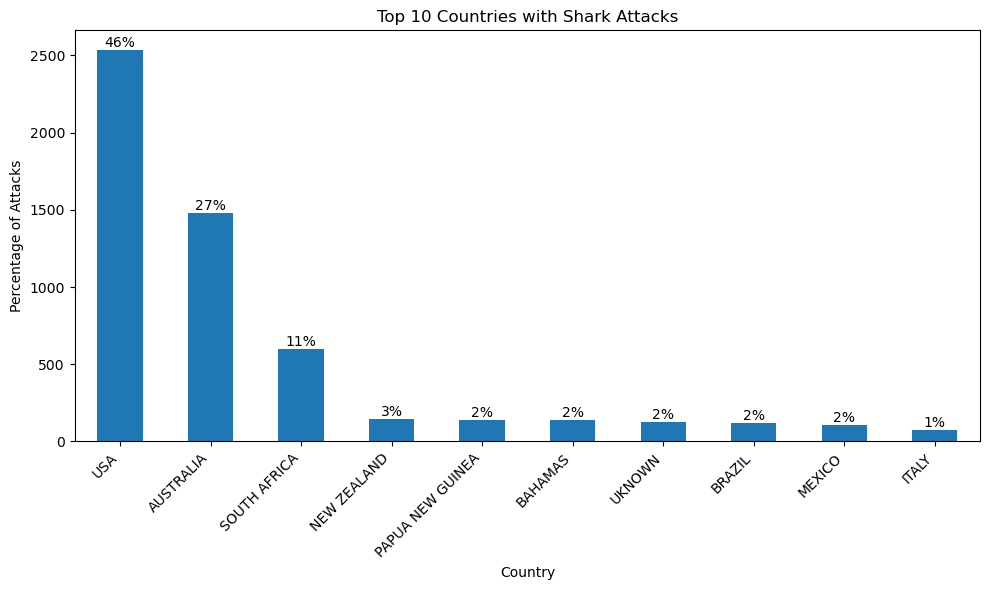

In [22]:

import matplotlib.pyplot as plt

# Country counts
country_counts = sharks_df['Country'].value_counts().head(10)  # Consider only the top 10 countries
total_attacks = country_counts.sum()

# Calculate percentages and round to whole numbers
percentages = (country_counts / total_attacks) * 100
percentages = percentages.round()

# Plotting
plt.figure(figsize=(10, 6))
bars = country_counts.plot(kind='bar')
plt.title('Top 10 Countries with Shark Attacks')
plt.xlabel('Country')
plt.ylabel('Percentage of Attacks')
plt.xticks(rotation=45, ha='right')

# Adding data callouts as percentage
for i, percent in enumerate(percentages):
    plt.annotate(f'{percent:.0f}%', xy=(i, country_counts[i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

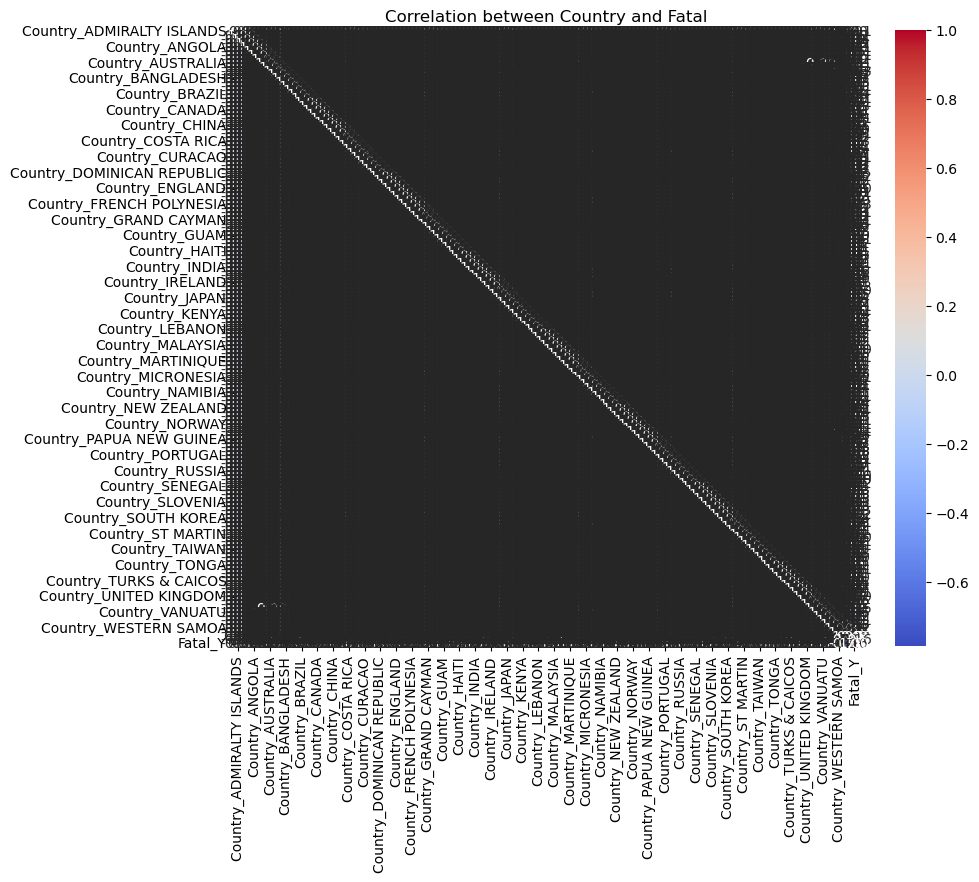

In [23]:
import seaborn as sns

# One-hot encode the 'Country' and 'Fatal' columns
sharks_encoded = pd.get_dummies(sharks_df[['Country', 'Fatal']])

# Compute the correlation matrix
correlation_matrix = sharks_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Country and Fatal')
plt.show()

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get country counts
country_counts = sharks_df['Country'].value_counts().head(30)

# Merge country counts with world map
world = world.merge(country_counts, how='left', left_on='name', right_on="Country")
world
# # Fill missing values with 0 (countries with no shark attacks)
# world[country_counts.name] = world[country_counts.name].fillna(0)

# # Calculate percentages
# total_attacks = country_counts.sum()
# world['Percentage'] = (world[country_counts.name] / total_attacks) * 100

# # Plotting
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# world.plot(column='Percentage', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# # Add title and legend
# ax.set_title('Percentage of Shark Attacks by Country', fontdict={'fontsize': '15'})
# ax.set_axis_off()
# plt.tight_layout()
# plt.show()

C:\Users\darce\AppData\Local\Temp\ipykernel_14424\3574272112.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,count
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN
...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


In [25]:
"asd" == "ASD"

False